In this project I'll be using a dataset of gold prices per day from 2000 to 2022. The dataset contains the following columns:
- Date
- Close
- Open
- High
- Low
- Volume
- Currency.

The goal of this project is to predict the price of gold in the future using the data from the past.

In [10]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('gold.csv')
print(data)

            Date    Open     High      Low   Close  Volume Currency
0     2000-01-04   289.5   289.50   280.00   283.7   21621      USD
1     2000-01-05   283.7   285.00   281.00   282.1   25448      USD
2     2000-01-06   281.6   282.80   280.20   282.4   19055      USD
3     2000-01-07   282.5   284.50   282.00   282.9   11266      USD
4     2000-01-10   282.4   283.90   281.80   282.7   30603      USD
...          ...     ...      ...      ...     ...     ...      ...
5698  2022-08-29  1748.4  1757.90  1731.40  1749.7  156220      USD
5699  2022-08-30  1749.8  1752.80  1732.90  1736.3  130664      USD
5700  2022-08-31  1735.5  1738.00  1720.60  1726.2  176731      USD
5701  2022-09-01  1723.0  1723.00  1699.10  1709.3  198618      USD
5702  2022-09-02  1707.9  1729.45  1707.05  1723.0       0      USD

[5703 rows x 7 columns]


Currency column has the same value for all rows, so I'll drop it.

In [11]:
data_whithout_currency = data.drop('Currency', axis=1)

In [12]:
data_whithout_currency.describe()

,Open,High,Low,Close,Volume
count,5703.000000,5703.000000,5703.000000,5703.000000,5703.000000
mean,1040.382816,1048.339181,1031.863169,1040.298282,139141.669297
std,518.733377,522.353946,514.455903,518.524020,102537.449058
min,256.600000,259.400000,255.100000,256.600000,0.000000
25%,459.850000,463.900000,457.450000,460.500000,52938.500000
50%,1188.800000,1198.000000,1179.700000,1188.700000,126006.000000
75%,1381.400000,1392.750000,1368.100000,1383.050000,193109.000000
max,2076.400000,2089.200000,2049.000000,2069.400000,816531.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5703 entries, 0 to 5702
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5703 non-null   object 
 1   Open      5703 non-null   float64
 2   High      5703 non-null   float64
 3   Low       5703 non-null   float64
 4   Close     5703 non-null   float64
 5   Volume    5703 non-null   int64  
 6   Currency  5703 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 312.0+ KB


The premise here is based on the principle: Time repeats itself. This principle is very know in the trading field and was first introduced by Charles Dow. Based on this principle we can conclude that the price of a stock will repeat itself in the future, therefore time variables can explain the price variable. Adding to that, the opening price can also affect the close price as it can affect the movement of the market by the supply and demand law.
High, Low and Volume variables can only be determined by the and of the day and therefore cannot be used to predict the close price.

In [14]:
X_ = data_whithout_currency
X_ = X_.drop('High', axis=1)
X_ = X_.drop('Low', axis=1)
X_ = X_.drop('Volume', axis=1)
# X_ = X_.drop('Open', axis=1)
# encode the date column on 3 columns (year, month, day)
X_['Year'] = pd.to_datetime(X_['Date']).dt.year
X_['Month'] = pd.to_datetime(X_['Date']).dt.month
X_['Day'] = pd.to_datetime(X_['Date']).dt.day
X_ = X_.drop('Date', axis=1)
X_.head()


,Open,Close,Year,Month,Day
0,289.5,283.7,2000,1,4
1,283.7,282.1,2000,1,5
2,281.6,282.4,2000,1,6
3,282.5,282.9,2000,1,7
4,282.4,282.7,2000,1,10


In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [23]:
variables = X_.columns.drop('Close')
y=X_.Close
X=X_[variables]

In [17]:
model.fit(X,y)

print (model.intercept_)
print (model.coef_)

-232.93226995159603
[ 0.99800888  0.11699723 -0.02148676 -0.01313112]


In [18]:
SCT = sum((y - y.mean())**2) # Sum of squares total
print(SCT)
SCR=sum((y - model.predict(X))**2) # Sum of squares of residuals
print(SCR)
SCE=sum((model.predict(X) - y.mean())**2) # Sum of squares of explained
print(SCE)

1533080543.7231612
797322.1646909678
1532283221.5584679


In [19]:
# r squared
print(SCE/SCT)

0.9994799215423105


R²= 99.99%. This means that the model explains the data very well.

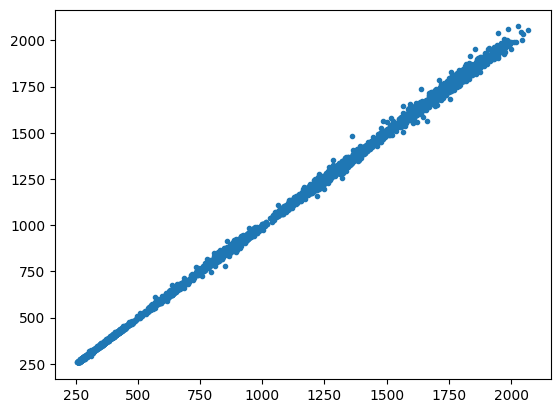

In [20]:
plt.plot(y, model.predict(X), '.')
plt.show()

The graph shows a very good linear regression between the predicted and the actual close price.

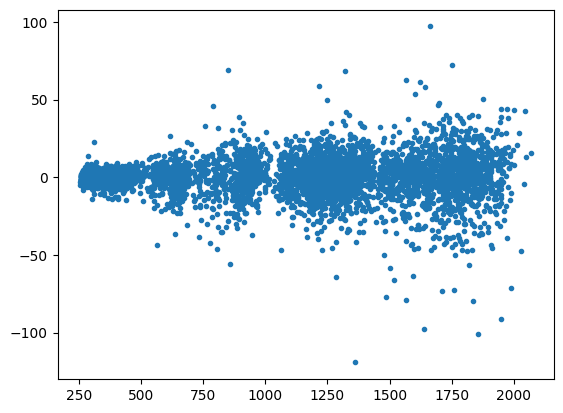

In [21]:
plt.plot(y, y-model.predict(X), '.')
plt.show()

The error is small, which means that the model is very accurate.

In [24]:
from statsmodels.regression.linear_model import OLS
model = OLS(y, X)
results = model.fit()
su = results.summary()
su

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.376e+07
Date:                Sun, 14 May 2023   Prob (F-statistic):                        0.00
Time:                        10:50:40   Log-Likelihood:                         -22182.
No. Observations:                5703   AIC:                                  4.437e+04
Df Residuals:                    5699   BIC:                                  4.440e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Open           0.9993      0.000   3288.627      0.000       0.999       1.000
Year           0.0005      0.000      1.867      0.062   -2.51e-05       0.001
Month         -0.0289      0.046     -0.630      0.528      -0.119       0.061
Day           -0.0134      0.018     -0.750      0.453      -0.049       0.022
==============================================================================
Omnibus:                     1474.593   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24574.685
Skew:                          -0.792   Prob(JB):                         0.00
Kurtosis:                      13.045   Cond. No.                         668.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The Open variable is the only one with a valid t value (3288.627), while time variables have a t value between 2 and -2 meaning that they're coeffients can be considered as 0. This means that the time variables are not statistically significant. H0 is accepted for all time variables.

In [26]:
import statsmodels.formula.api as smf
regr = smf.ols(formula='Close ~ Day + Month + Year + Open', data=X_).fit()
print(regr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.738e+06
Date:                Sun, 14 May 2023   Prob (F-statistic):               0.00
Time:                        10:50:59   Log-Likelihood:                -22179.
No. Observations:                5703   AIC:                         4.437e+04
Df Residuals:                    5698   BIC:                         4.440e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -232.9323    110.812     -2.102      0.0

The open variable is statistically significant. H0 is rejected for the open variable. It has the highest t value. We can use it to predict the close price.